In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import pdb
import numpy as np
import numpy.random as npr
import tensorflow as tf
# from tensorflow.python.ops import parallel_for as pfor

import sys
PATH_YANGNET = '/Users/lauradriscoll/Documents/code/multitask-nets/stepnet' #'/home/laura/code/yangnet/training'
sys.path.insert(0, PATH_YANGNET)
from task import generate_trials, rule_name, rule_index_map, rules_dict
from network import Model
import tools

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
# from brewer2mpl import qualitative

from task import generate_trials, rule_name, Trial
from scipy import linalg as LA
import json
from datetime import datetime as datetime
import re


import getpass
ui = getpass.getuser()
if ui == 'laura':
    p = '/home/laura'
elif ui == 'lauradriscoll':
    p = '/Users/lauradriscoll/Documents'

In [2]:
net = 'stepnet'
# epoch = 'go1' # epoch = 2 #go1 epoch
# rule = 'delaygo'
# model_n = 0
# dir_specific_all = 'grad_norm_both/'#'stepnet/lowD/softplus/'#'lowD/combos'#'stepnet/lowD/tanh'#'lowD/grad_norm_l2001' #' #'lowD/armnet_noreg'#lowD/combos' ##grad_norm_l2h000001' /Documents/data/rnn/multitask/varGo/lowD/most/
# model_dir = os.path.join(p,'data/rnn/multitask/',dir_specific_all,'most',str(model_n))

PATH_YANGNET = os.path.join(p,'code/multitask-nets',net)

sys.path.insert(0, PATH_YANGNET)
from task import generate_trials, rule_name, rule_index_map
from network import Model
import tools
from tools_lnd import plot_N, plot_FP, name_best_ckpt, gen_X_from_model_dir, find_ckpts

In [3]:
rule = 'delaygo'
model_dir = os.path.join(p,'data/rnn/multitask/crystals/softplus/no_reg/0')
model_dir = '/Users/lauradriscoll/Documents/data/rnn/multitask/lowD/grad_norm_l2001/'+rule+'/0'
model = Model(model_dir)
with tf.Session() as sess:
    model.restore()
    # get all connection weights and biases as tensorflow variables
    var_list = model.var_list
    # evaluate the parameters after training
    params = [sess.run(var) for var in var_list]
    # get hparams
    hparams = model.hp
    print(model.hp)
    # create a trial
    trial = generate_trials(rule, hparams, mode='test', noise_on=False, batch_size =500, delay_fac =1)
    # get feed_dict
    feed_dict = tools.gen_feed_dict(model, trial, hparams)
    # run model
    h_tf, y_hat_tf = sess.run([model.h, model.y_hat], feed_dict=feed_dict) #(n_time, n_condition, n_neuron)

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
Instructions for updating:
Use `tf.global_variables_initializer` instead.
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/lowD/grad_norm_l2001/delaygo/0/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/rnn/multitask/lowD/grad_norm_l2001/delaygo/0/model.ckpt
{u'tau': 100, u'l2_weight_init': 0, u'w_rec_init': u'randortho', u'alpha': 0.2, u'target_cost': 0, u'l2_h': 0, u'n_output': 3, u'rule_start': 5, u'sigma_x': 0.01, u'batch_size_train': 64, u'target_perf': 1.0, u'l1_h': 0, u'n_rnn': 256, u'rules': [u'delaygo'], u'n_eachring': 2, u'p_weight_train': None, u'learning_rate': 0.001, u'save_name': u'test', u'ruleset': u'all

In [7]:
fldr = os.path.join('sfn/delaygo_computation/')
if not os.path.exists(fldr):
    os.makedirs(fldr)

In [65]:
np.shape(X_stim_only)

(256, 200)

delaygo
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/crystals/softplus/no_reg/0/ckpts/model.ckpt-389000


/Users/lauradriscoll/anaconda2/envs/tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in log10


delaygo
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/crystals/softplus/l2h00001/0/ckpts/model.ckpt-1235000


/Users/lauradriscoll/anaconda2/envs/tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py:70: RuntimeWarning: invalid value encountered in log10


delaygo
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/crystals/softplus/l2w0001/0/ckpts/model.ckpt-270000
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/crystals/softplus/l2w0001/0/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/rnn/multitask/crystals/softplus/l2w0001/0/m

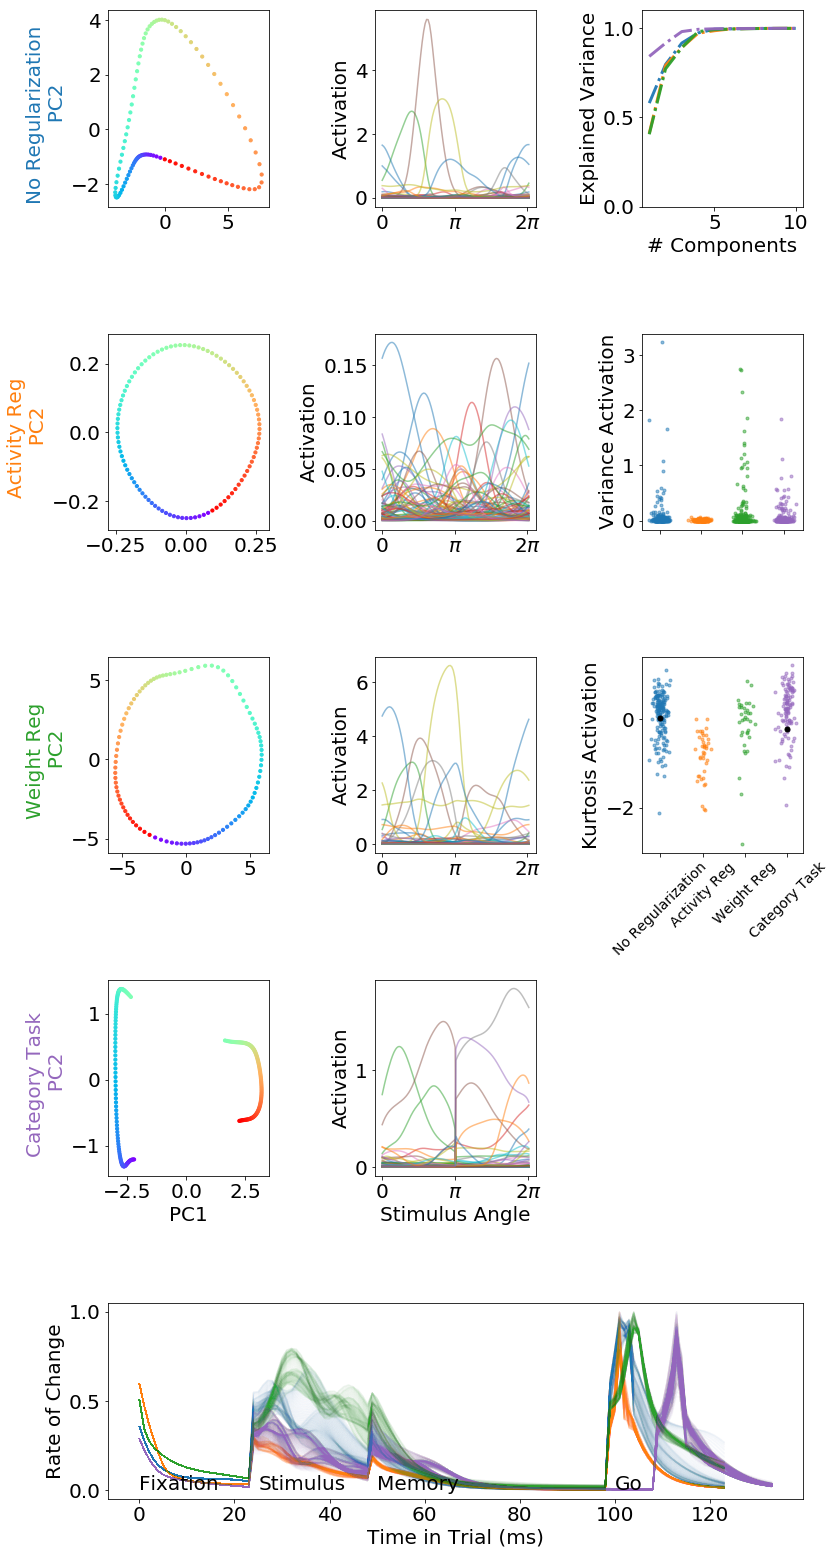

In [82]:
from scipy.stats import kurtosis
nr = 5
nc = 3
T = 125
model_n = 0
std_set = {}
act = 'softplus'
multi = False
epoch_set = ['fix1','stim1','delay1','go1']
epoch_names = ['Fixation','Stimulus','Memory','Go']

if act == 'relu':
    dir_set = ['lowD/combos/most','lowD/grad_norm_l2h000001/most','lowD/grad_norm_l2001/most','lowD/combos/most'] 

else:
    dir_set = ['crystals/softplus/no_reg','crystals/softplus/l2h00001','crystals/softplus/l2w0001','crystals/softplus/no_reg']

filename = 'stepnet_lowD_' + act
labels = ['No Regularization','Activity Reg','Weight Reg','Category Task']
ruleset = ['delaygo','delaygo','delaygo','dmcgo']
fig = plt.figure(figsize=(12, 22),tight_layout=True,facecolor='white')
plt.rcParams.update({'font.size': 20})
cmap=plt.get_cmap('tab10')

for d in range(np.shape(dir_set)[0]):
    if d==3:
        c = cmap((d+1)/10);
    else:
        c = cmap(d/10);
    
    if rule == ruleset[d]:
        print(rule)
    else:
        rule = ruleset[d]
        model = Model(model_dir)
        with tf.Session() as sess:
            model.restore()
            var_list = model.var_list
            params = [sess.run(var) for var in var_list]
            hparams = model.hp
            trial = generate_trials(rule, hparams, mode='test', noise_on=False, batch_size =500, delay_fac =1)
    
    for model_n in range(0,1):
        model_dir = os.path.join(p,'data/rnn/multitask/',dir_set[d],str(model_n))
        ckpt_n = name_best_ckpt(model_dir,rule)
        ckpt_n_dir = os.path.join(model_dir,'ckpts/model.ckpt-' + str(int(ckpt_n)))
        X,x = gen_X_from_model_dir(model_dir,ckpt_n_dir,trial)
        pca = PCA()
        X_stim_only = x[:,0:-1:4,trial.epochs['stim1'][1]-1]
        pca.fit(X_stim_only)
        X_pca = pca.fit_transform(X_stim_only.T)
        ev_all = pca.explained_variance_ratio_

        ax1 = plt.subplot(nr,nc,3)
        plt.plot(np.cumsum(ev_all[0:10]/sum(ev_all)),'-.',c = c,label = labels[d], alpha = .95,linewidth = 3)
        ax1.set_xlabel('# Components')
        ax1.set_ylabel('Explained Variance')
        ax1.set_ylim((0,1.1))
        plt.xticks(np.arange(4, 10, step=5), np.arange(5, 11, step=5)) 
        
        ax1 = plt.subplot(nr,nc,6)
        plt.plot(d+npr.randn(np.shape(X_stim_only)[0])/10,(np.std(X_stim_only,axis=1)),'.',c=c,alpha = .5)
#         plt.plot(d,np.log10(np.mean(np.sum(X_stim_only,axis=1))),'o',c='k',markersize = 5)
        plt.xticks(range(len(labels)),[])
        ax1.set_ylabel('Variance Activation')
        std_set[d] = np.std(X_stim_only,axis=1)
        
        ax1 = plt.subplot(nr,nc,9)
        plt.plot(d+npr.randn(np.shape(X_stim_only)[0])/10,np.log10(kurtosis(X_stim_only,axis=1)),'.',c=c,alpha = .5)
        plt.plot(d,np.log10(np.mean(kurtosis(X_stim_only,axis=1))),'o',c='k',markersize = 5)
        plt.xticks(range(len(labels)),labels, rotation=45, fontsize = 14)
        ax1.set_ylabel('Kurtosis Activation')
        std_set[d] = np.std(X_stim_only,axis=1)
        
        diff_mov = np.diff(x,axis = 2)
        mov = LA.norm(diff_mov,axis = 0)
            
        ax1 = plt.subplot(nr,1,nr)
        plt.plot(mov.T/np.max(mov.flatten()),c=c,alpha = .01)
#         plt.plot(np.mean(mov,axis = 0).T/np.max(mov.flatten()),c=c)
        ax1.set_ylabel('Rate of Change')
    
        if d==0:
            for ei in range(len(trial.epochs)):
                epoch = epoch_set[ei]
                if trial.epochs[epoch][1] is None:
                    epoch_range = range(trial.epochs[epoch][0],T)
                elif trial.epochs[epoch][0] is None:
                    epoch_range = range(0,trial.epochs[epoch][1])
                else:
                    epoch_range = range(trial.epochs[epoch][0],trial.epochs[epoch][1])
                plt.text(epoch_range[0],0,epoch_names[ei])

            plt.xlabel('Time in Trial (ms)')

        ax1 = plt.subplot(nr,nc,1+d*3)
        plt.scatter(X_pca[:,0],X_pca[:,1],10,range(int(np.shape(X_pca)[0])),cmap = 'rainbow')
        if d==3:
            ax1.set_xlabel('PC1')
        ax1.set_ylabel(labels[d]+'  \n  PC2',color = c)

        ax1 = plt.subplot(nr,nc,2+d*3)
        plt.plot(X_stim_only[0:-1:3,:].T,alpha = .5)
        if d==3:
            ax1.set_xlabel('Stimulus Angle')
        ax1.set_ylabel('Activation')
        plt.xticks(np.arange(0, np.shape(X_stim_only)[1], step=int(np.shape(X_stim_only)[1]/2-1)), ('0','$\pi$','$2\pi$'))
    
plt.savefig(fldr + '/category_task_rep' + net + '_' + rule + 
        filename + '_ckpt_'+ str(ckpt_n) + '_model_' + str(model_n) + '.svg')    
plt.show()

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/crystals/softplus/no_reg/0/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/rnn/multitask/crystals/softplus/no_reg/0/model.ckpt
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/crystals/softplus/no_reg/0/ckpts/model.ckpt-389000


ValueError: x and y must have same first dimension, but have shapes (25,) and (124, 400)

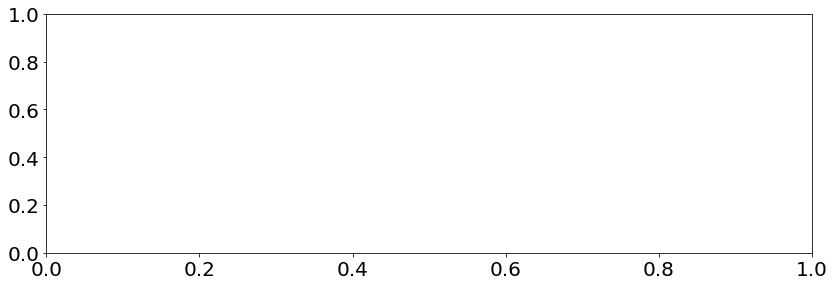

In [83]:
from scipy.stats import kurtosis
nr = 2
model_n = 0
std_set = {}
act = 'softplus'
plot_range = range(10*epoch_range[0],10*(epoch_range[-1]+1),10)

if act == 'relu':
    dir_set = ['lowD/combos/most','lowD/grad_norm_l2h000001/most','lowD/grad_norm_l2001/most']#,'lowD/combos/most'] 
else:
    dir_set = ['crystals/softplus/no_reg','crystals/softplus/l2h00001','crystals/softplus/l2w0001']#,'crystals/softplus/no_reg']

filename = 'stepnet_lowD_' + act
labels = ['No Regularization','Activity Reg','Weight Reg']#,'Category Task']
ruleset = ['delaygo','delaygo','delaygo']#,'dmcgo']
fig = plt.figure(figsize=(12, 4*nr),tight_layout=True,facecolor='white')
plt.rcParams.update({'font.size': 20})
cmap=plt.get_cmap('tab10')

for d in range(np.shape(dir_set)[0]):
    if d==3:
        c = cmap((d+1)/10);
    else:
        c = cmap(d/10);
    
    if rule == ruleset[d]:
        print(rule)
    else:
        rule = ruleset[d]
        model = Model(model_dir)
        with tf.Session() as sess:
            model.restore()
            var_list = model.var_list
            params = [sess.run(var) for var in var_list]
            hparams = model.hp
            trial = generate_trials(rule, hparams, mode='test', noise_on=False, batch_size =500, delay_fac =1)
    
    for model_n in range(nr):
        model_dir = os.path.join(p,'data/rnn/multitask/',dir_set[d],str(model_n))
        ckpt_n = name_best_ckpt(model_dir,rule)
        ckpt_n_dir = os.path.join(model_dir,'ckpts/model.ckpt-' + str(int(ckpt_n)))
        X,x = gen_X_from_model_dir(model_dir,ckpt_n_dir,trial)
        
        diff_mov = np.diff(x,axis = 2)
        mov = LA.norm(diff_mov,axis = 0)
            
        ax1 = plt.subplot(nr,1,model_n+1)
        plt.plot(mov.T/np.max(mov.flatten()),c=c,alpha = .01)
        ax1.set_ylabel('Rate of Change')
        
        if d==0:
            for ei in range(len(trial.epochs)):
                epoch = epoch_set[ei]
                if trial.epochs[epoch][1] is None:
                    epoch_range = range(trial.epochs[epoch][0],T)
                elif trial.epochs[epoch][0] is None:
                    epoch_range = range(0,trial.epochs[epoch][1])
                else:
                    epoch_range = range(trial.epochs[epoch][0],trial.epochs[epoch][1])
                plt.text(epoch_range[0],0,epoch_names[ei])

            plt.xlabel('Time in Trial (ms)')

plt.savefig(fldr + '/rate_change' + net + '_' + rule + 
        filename + '_ckpt_'+ str(ckpt_n) + '_model_' + str(model_n) + '.svg')    
plt.show()

In [17]:
rule = 'delaygo'

s_all = find_ckpts(model_dir)
s_all_inds = np.sort(s_all)
s_all_inds = s_all_inds.astype(int)
fname = os.path.join(model_dir, 'log.json')

with open(fname, 'r') as f:
    log_all = json.load(f)
    x = log_all['cost_'+rule]

y = [x[int(j/1000)] for j in s_all_inds[:-1]]
ind = int(s_all_inds[np.argmin(y)])

In [2]:
for d in range(np.shape(dir_set)[0]):
    
    for model_n in [1]:
        
        model_dir = os.path.join(p,'data/rnn/multitask/',dir_set[d],str(model_n))
        model = Model(model_dir)
        
        with tf.Session() as sess:
            model.restore()
            # model._sigma=0
            # get all connection weights and biases as tensorflow variables
            var_list = model.var_list
            # evaluate the parameters after training
        #         params = [sess.run(var) for var in var_list]
            # get hparams
            hparams = model.hp

        print(hparams['activation'])

NameError: name 'np' is not defined

In [10]:
model_dir_single = '/home/laura/code/yangnet/training/data/lowDin/'
# model_dir_all = '/home/laura/code/yangnet/training/data/lowDin/'
model_dir_single = os.path.join('/Users/lauradriscoll/Documents/data/rnn/multitask/lowD/single_tasks')
model_dir_all = os.path.join('/Users/lauradriscoll/Documents/data/rnn/multitask/lowD/')
rule = 'delaygo'
epoch = 'stim1'
cmap=plt.get_cmap('tab10')
n_trials = 400

trial = gen_trials_from_model_dir(os.path.join(model_dir_single,rule, str(0)),rule)
# y = np.repeat(trial.stim_locs[0:n_trials],range_size)

fig = plt.figure(figsize=(5, 5),tight_layout=True,facecolor='white')
plt.rcParams.update({'font.size': 16})
ax1 = plt.subplot(1,1,1)

x = np.zeros((2,5))
for model_n in range(2):
    model_dir = os.path.join(model_dir_all,'combos/most', str(model_n))
#     model_dir = os.path.join(model_dir_all,rule, str(model_n))
    ckpt_n = name_best_ckpt(model_dir)
    ckpt_n_dir = os.path.join(model_dir,'ckpts/model.ckpt-' + str(int(ckpt_n)))
    X,x = gen_X_from_model_dir(model_dir,ckpt_n_dir,trial)
    pca = PCA()
    pca.fit(X)
    X_pca = pca.fit_transform(X.T)
    ev_all = pca.explained_variance_ratio_

    fname = os.path.join(model_dir, 'log.json')
    with open(fname, 'r') as f:
        log_all = json.load(f)
        x[1,model_n] = log_all['cost_'+rule][int(ckpt_n/1000)]
        
    plt.plot(np.cumsum(ev_all[0:10]/sum(ev_all)),'-ok',label = 'most  ' + str(np.round(x[1,model_n],3)))

for model_n in range(5):
    model_dir = os.path.join(model_dir_single,rule,str(model_n))
    ckpt_n = name_best_ckpt(model_dir)
    ckpt_n_dir = os.path.join(model_dir,'ckpts/model.ckpt-' + str(int(ckpt_n)))
    X = load_X_from_model_dir(model_dir,ckpt_n_dir,trial)
    pca = PCA()
    pca.fit(X)
    X_pca = pca.fit_transform(X.T)
    ev_single = pca.explained_variance_ratio_

    fname = os.path.join(model_dir, 'log.json')
    with open(fname, 'r') as f:
        log_all = json.load(f)
        x[0,model_n] = log_all['cost_'+rule][int(ckpt_n/1000)]
        
    plt.plot(np.cumsum(ev_single[0:10]/sum(ev_single)),'-o',label = 'single  ' + str(np.round(x[0,model_n],3)))
    
ax1.set_xlabel('# Components')
ax1.set_ylabel('Explained Variance')
plt.legend()

plt.savefig('cosyne/delaygo_computation/' + rule + '_dimensionality.svg')
plt.show()


Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/lowD/single_tasks/delaygo/0/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/rnn/multitask/lowD/single_tasks/delaygo/0/model.ckpt
[620 630 640 650]
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/lowD/combos/most/0/ckpts/model.c

In [3]:
model_dir = '/home/laura/code/yangnet/training/data/lowDin/delaygo/0'
# model_dir = '/home/laura/code/yangnet/training/data/lowDin/most/0'
rule = 'delaygo'
epoch = 'stim1'
model_n = 0
cmap=plt.get_cmap('rainbow')
model_dir = os.path.join('/Users/lauradriscoll/Documents/data/rnn/multitask/lowD/single_tasks/',rule,str(model_n))
n_trials = 100

trial = gen_trials_from_model_dir(model_dir,rule)
epoch_max, epoch_min = maxmin_epoch(trial,epoch)
range_size = epoch_max-epoch_min

ckpt_n = name_best_ckpt(model_dir)
ckpt_n_dir = os.path.join(model_dir,'ckpts/model.ckpt-' + str(int(ckpt_n)))
X = load_X_from_model_dir(model_dir,ckpt_n_dir,trial)
# X,trial = gen_X_from_model_dir_epoch(model_dir,rule,epoch,range_size)
y = np.repeat(trial.stim_locs[0:n_trials],range_size)

pca = PCA()
pca.fit(X)
X_pca = pca.fit_transform(X.T)
ev = pca.explained_variance_ratio_

ax1 = plt.subplot(1,2,1)
plt.plot(np.cumsum(ev[0:10]/sum(ev)),'-o')
ax1.set_xlabel('# Components')
ax1.set_ylabel('Explained Variance')

run_mean=1
fname = os.path.join(model_dir, 'log.json')
with open(fname, 'r') as f:
    log_all = json.load(f)
x = np.log(log_all['cost_'+rule])

ax2 = plt.subplot(1,2,2)
plt.plot(np.convolve(x, np.ones((run_mean,))/run_mean, mode='valid'))
    
ax2.set_xlabel('Training Step (x 1000)')
ax2.set_ylabel('log Validation Cost')

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
Instructions for updating:
Use `tf.global_variables_initializer` instead.
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/lowD/single_tasks/delaygo/0/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/rnn/multitask/lowD/single_tasks/delaygo/0/model.ckpt
[690 700 710 720]
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/l

Text(0,0.5,u'log Validation Cost')

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/lowD/single_tasks/delaygo/0/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/rnn/multitask/lowD/single_tasks/delaygo/0/model.ckpt
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/lowD/single_tasks/delaygo/0/model.ckpt
Model resto

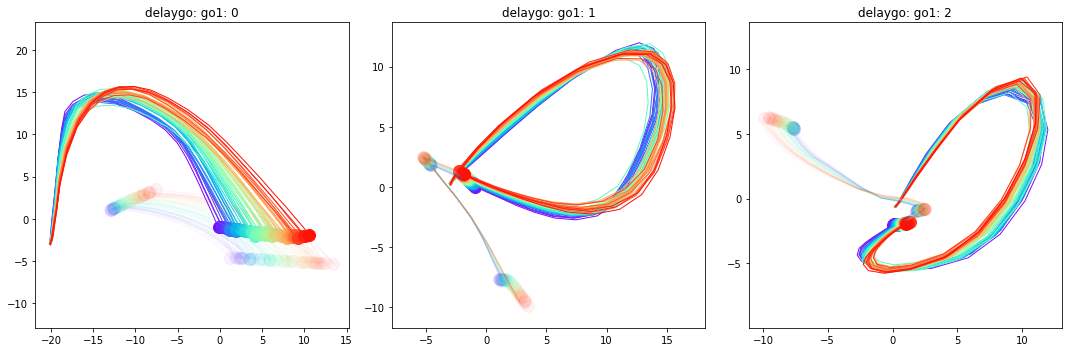

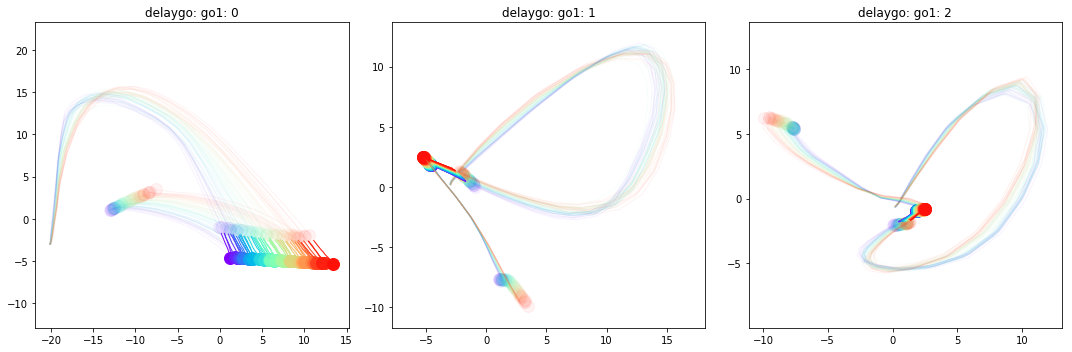

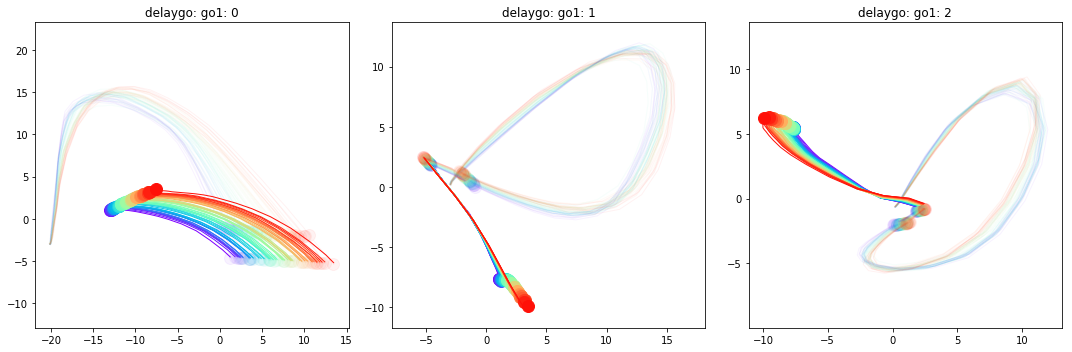

In [8]:
n_trials = 50
a_on = 1
a_off = .05
# rule = 'contextdelaydm1'
fig = plt.figure(figsize=(15, 5),tight_layout=True,facecolor='white')
plot_pca_segment(pca,trial,'stim1',n_trials,a_on)
plot_pca_segment(pca,trial,'delay1',n_trials,a_off)
plot_pca_segment(pca,trial,'go1',n_trials,a_off)
plt.savefig('cosyne/delaygo_computation/delaygo_dynamics_rainbow' + rule + '_' + 'stim' + '_' + str(model_n) + '.svg')

fig = plt.figure(figsize=(15, 5),tight_layout=True,facecolor='white')
plot_pca_segment(pca,trial,'stim1',n_trials,a_off)
plot_pca_segment(pca,trial,'delay1',n_trials,a_on)
plot_pca_segment(pca,trial,'go1',n_trials,a_off)
plt.savefig('cosyne/delaygo_computation/delaygo_dynamics_rainbow' + rule + '_' + 'delay' + '_' + str(model_n) + '.svg')

fig = plt.figure(figsize=(15, 5),tight_layout=True,facecolor='white')
plot_pca_segment(pca,trial,'stim1',n_trials,a_off)
plot_pca_segment(pca,trial,'delay1',n_trials,a_off)
plot_pca_segment(pca,trial,'go1',n_trials,a_on)

plt.savefig('cosyne/delaygo_computation/delaygo_dynamics_rainbow' + rule + '_' + 'go' + '_' + str(model_n) + '.svg')
plt.show()


Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /home/laura/code/yangnet/training/data/lowDin/delaygo/0/model.ckpt
Model restored from file: /home/laura/code/yangnet/training/data/lowDin/delaygo/0/model.ckpt
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /home/laura/code/yangnet/training/data/lowDin/delaygo/0/model.ckpt
Model restored from file: /home/laura/code/yangnet/training/data/lowDin/delay

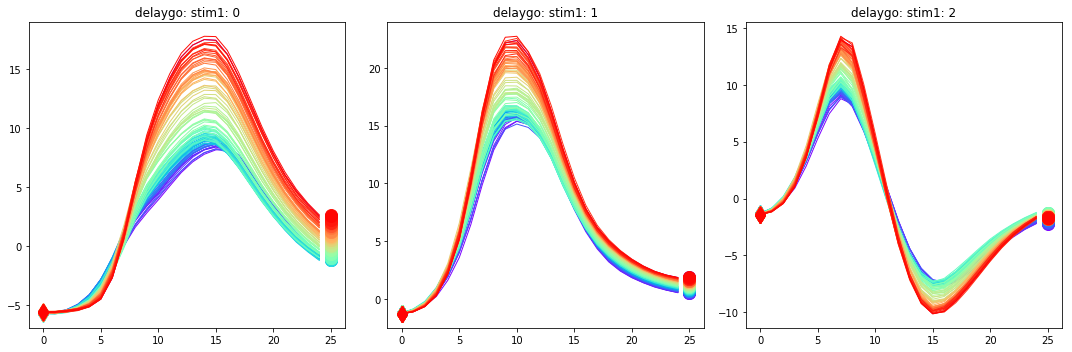

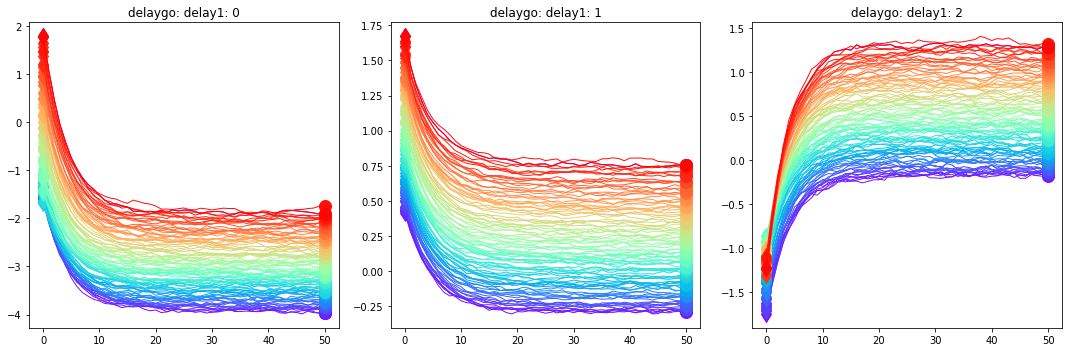

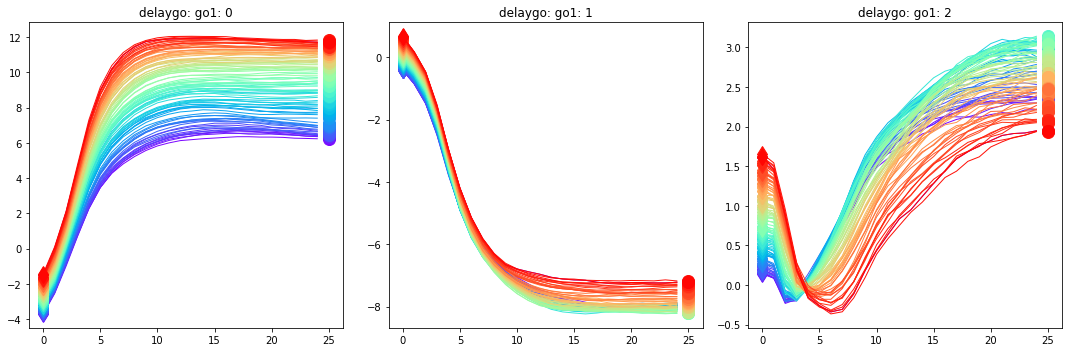

In [197]:
plot_pca_timecourse(pca,trial,'stim1',n_trials)
plot_pca_timecourse(pca,trial,'delay1',n_trials)
plot_pca_timecourse(pca,trial,'go1',n_trials)

In [12]:
# import sys
# from numpy.random import rand, randn, randint
# PATH_TO_dPCA = '/home/laura/code/dPCA'
# sys.path.insert(0, PATH_TO_dPCA)
# from dPCA import dPCA

model_path = '/home/laura/code/yangnet/training/data/lowDin'

model_path = '/home/laura/code/yangnet/training/data/lowDin/grad_norm_l2001'
# model_path = '/home/laura/code/yangnet/training/data/lowDin'
rule = 'delaygo'
epoch = 'stim1'
model_n = 0
model_dir = os.path.join(model_path,rule,str(model_n))
figname = 'main_axes_' + rule + str(model_n)

#####
most = 0
#####

if most:
    model_dir = os.path.join(model_path,'combos/most',str(model_n))
    figname = 'main_axes_' + 'most' + rule + str(model_n)
    
cmap=plt.get_cmap('rainbow')
n_trials = 1000

trial = gen_trials_from_model_dir(model_dir,rule)
model = Model(model_dir)
ckpt_n = name_best_ckpt(model_dir)
ckpt_n_dir = os.path.join(model_dir,'ckpts/model.ckpt-' + str(int(ckpt_n)))
Z = fit_dpca(model,ckpt_n_dir,trial)
N,S,T = np.shape(Z['t'])

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /home/laura/code/yangnet/training/data/lowDin/grad_norm_l2001/delaygo/0/model.ckpt
Model restored from file: /home/laura/code/yangnet/training/data/lowDin/grad_norm_l2001/delaygo/0/model.ckpt
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 5

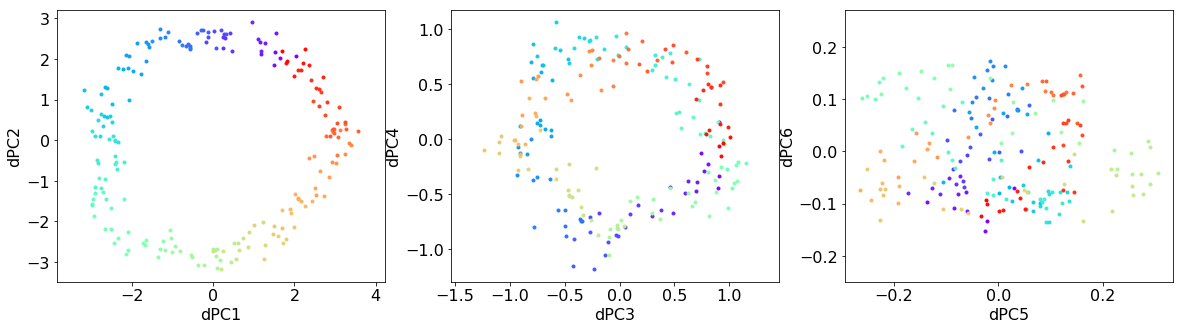

In [13]:
plt.figure(figsize=(20,5))
plt.rcParams.update({'font.size': 16})
col = 3

for s in range(S):
    c = cmap(s/S)
    
    plt.subplot(1,col,1)
    plt.plot(Z['s'][0,s][-1],Z['s'][1,s][-1],'.',c = c)
    plt.axis('equal')
    plt.xlabel('dPC1')
    plt.ylabel('dPC2')
    
    plt.subplot(1,col,2)
    plt.plot(Z['s'][2,s][-1],Z['s'][3,s][-1],'.',c = c)
    plt.axis('equal')
    plt.xlabel('dPC3')
    plt.ylabel('dPC4')
    
    plt.subplot(1,col,3)
    plt.plot(Z['s'][4,s][-1],Z['s'][5,s][-1],'.',c = c)
    plt.axis('equal')
    plt.xlabel('dPC5')
    plt.ylabel('dPC6')

    
plt.savefig('cosyne/delaygo_computation/' + figname + '.svg')

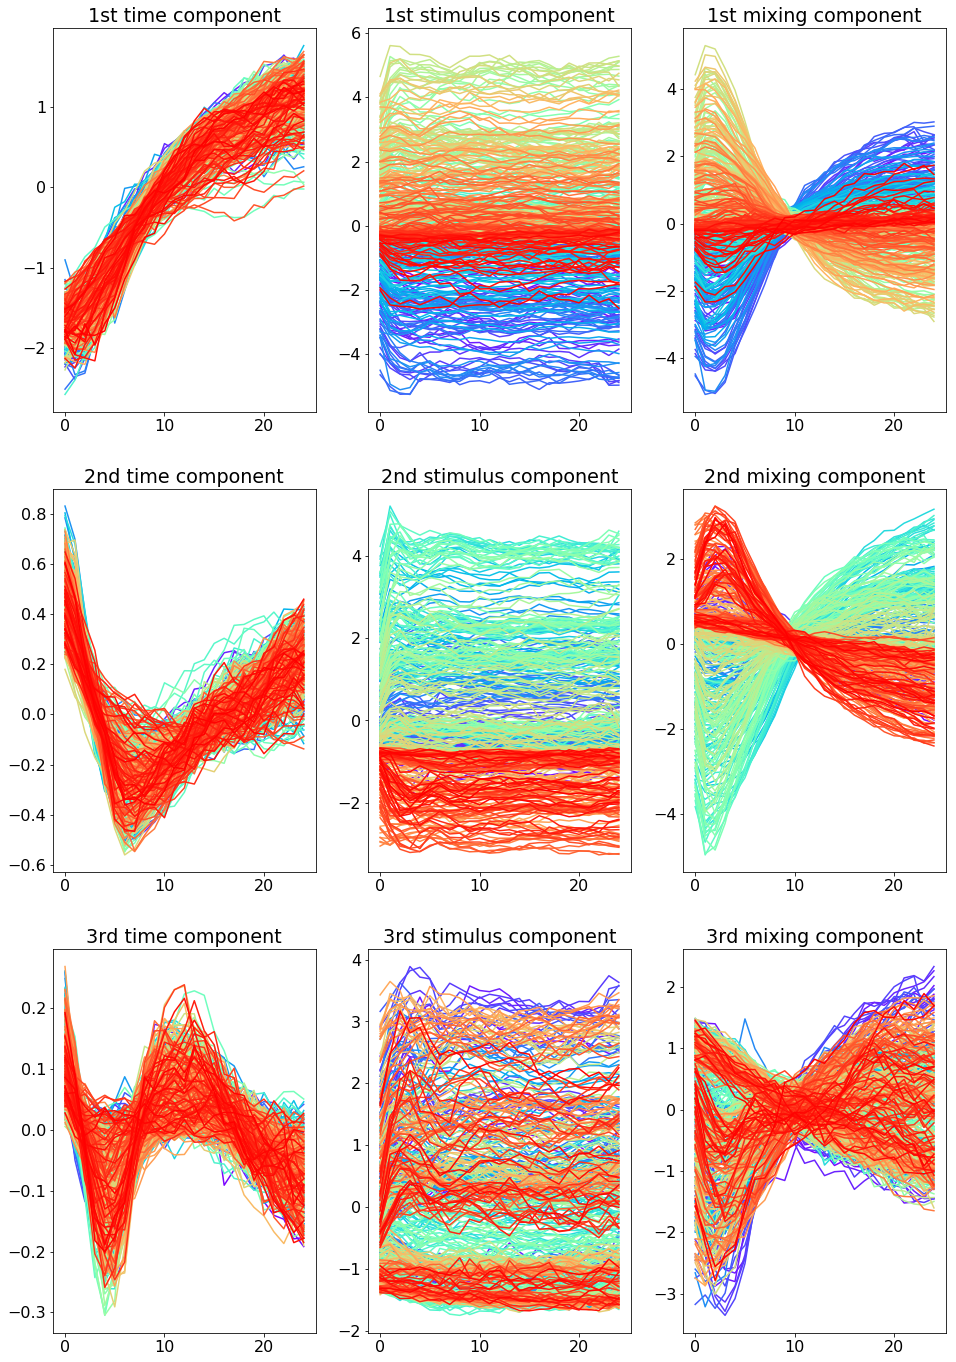

In [21]:
N,S,T = np.shape(Z['t'])
time = np.arange(T)

plt.figure(figsize=(16,24))
cmap=plt.get_cmap('rainbow')

for s in range(S):
    c = cmap(s/S)
    plt.subplot(331)
    plt.plot(time,Z['t'][0,s],c = c)
    plt.title('1st time component')
    
    plt.subplot(334)
    plt.plot(time,Z['t'][1,s],c = c)
    plt.title('2nd time component')
    
    plt.subplot(337)
    plt.plot(time,Z['t'][2,s],c = c)
    plt.title('3rd time component')

    plt.subplot(332)
    plt.plot(time,Z['s'][0,s],c = c)
    plt.title('1st stimulus component')
    
    plt.subplot(335)
    plt.plot(time,Z['s'][1,s],c = c)
    plt.title('2nd stimulus component')
    
    plt.subplot(338)
    plt.plot(time,Z['s'][2,s],c = c)
    plt.title('3rd stimulus component')
    
    plt.subplot(333)
    plt.plot(time,Z['st'][0,s],c = c)
    plt.title('1st mixing component')
    
    plt.subplot(336)
    plt.plot(time,Z['st'][1,s],c = c)
    plt.title('2nd mixing component')
    
    plt.subplot(339)
    plt.plot(time,Z['st'][2,s],c = c)
    plt.title('3rd mixing component')
plt.show()

In [ ]:
model = Model(model_dir)
with tf.Session() as sess:
#     model.saver.restore(sess,ckpt_n_dir)
    x = model.saver.recover_last_checkpoints(model_dir)
    print(x)

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>


In [36]:
print(ckpt_list)

[58000, 68000, 78000, 88000, 98000, 108000, 118000, 128000, 138000, 148000, 158000]


In [65]:
# import sys
# from numpy.random import rand, randn, randint
# PATH_TO_dPCA = '/home/laura/code/dPCA'
# sys.path.insert(0, PATH_TO_dPCA)
# from dPCA import dPCA

model_dir = '/home/laura/code/yangnet/training/data/lowDin/'
rule = 'delaygo'
model_path = os.path.join('/Users/lauradriscoll/Documents/data/rnn/multitask/lowD/grad_norm_none/')
# model_path = os.path.join('/Users/lauradriscoll/Documents/data/rnn/multitask/lowD/single_tasks/')
# model_path = os.path.join('/Users/lauradriscoll/Documents/data/rnn/multitask/lowD/combos/')

epoch = 'stim1'
model_n = 1
cmap=plt.get_cmap('rainbow')

f = rule#'most'
model_dir = os.path.join(model_path,f,str(model_n))
figname = 'training_' + f + '_w_trials_' + rule + str(model_n)

trial = gen_trials_from_model_dir(model_dir,rule)
s_all = find_ckpts(model_dir)

Z_sall = {}
Z_tall = {}
Z_stall = {}
range_lims = [np.min(s_all),np.max(s_all),1]

w_in = np.expand_dims(np.zeros((281, 256)),axis=2)
ckpt_list = np.sort(s_all)[::6]



Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/lowD/grad_norm_none/delaygo/0/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/rnn/multitask/lowD/grad_norm_none/delaygo/0/model.ckpt


In [66]:
print(ckpt_list)

[    1     7  4000 10000 16000 22000 28000 34000 40000]


In [76]:
ckpt_n_dir = os.path.join(model_dir,'ckpts/model.ckpt-' + str(int(np.sort(s_all)[10])))
model = Model(model_dir)
_,pca_end = fit_pca(model,ckpt_n_dir,trial)

for ckpt_n in ckpt_list: #155):
    ckpt_n_dir = os.path.join(model_dir,'ckpts/model.ckpt-' + str(int(ckpt_n)))
    model = Model(model_dir)
    
    Z = transform_pca(model,ckpt_n_dir,trial,pca_end)
#     Z_sall[str(int(ckpt_n))] = Z['s']
#     Z_tall[str(int(ckpt_n))] = Z['t']
#     Z_stall[str(int(ckpt_n))] = Z['st']
    
    Z_sall[str(int(ckpt_n))] = Z
    Z_tall[str(int(ckpt_n))] = Z
    Z_stall[str(int(ckpt_n))] = Z

    

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/lowD/grad_norm_none/delaygo/0/ckpts/model.ckpt-2000
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/lowD/grad_norm_none/delaygo/0/ckpts/model.ckpt-1
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_re

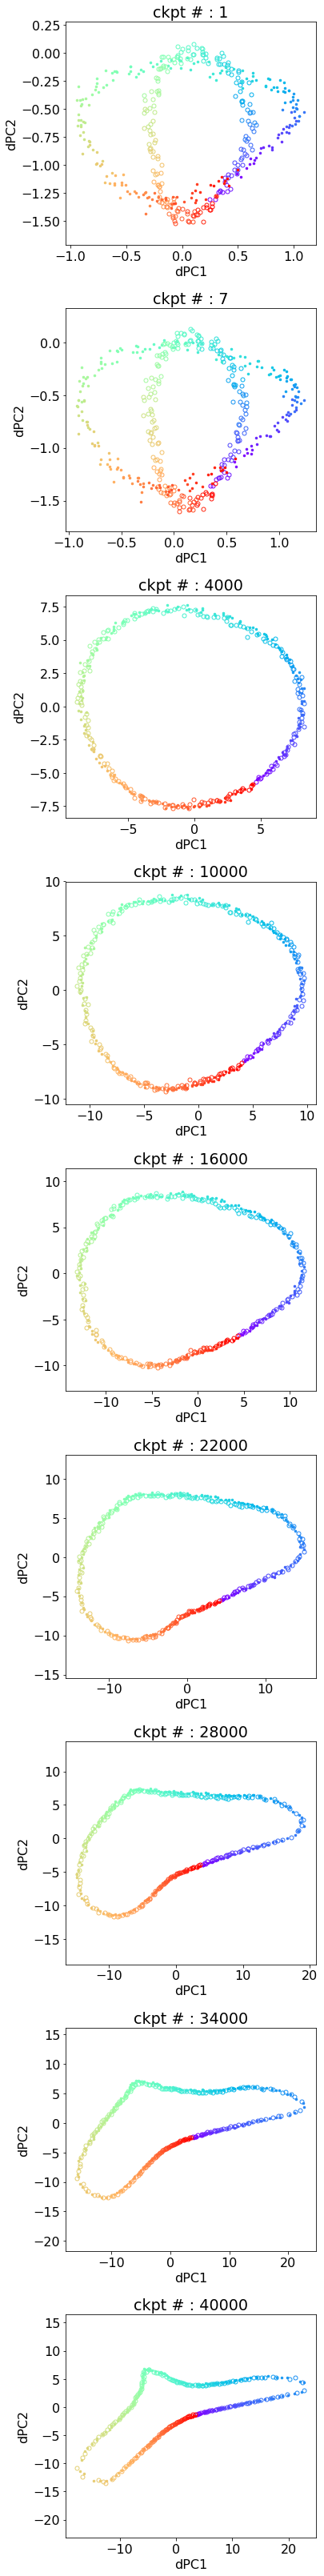

In [77]:
epoch = 'stim1'
trial_inds = range(trial.epochs[epoch][0],trial.epochs[epoch][1])
trial_inds = range(0,25)

# ckpt_list = range(int(range_lims[0]),int(range_lims[1]+10000),10000)
# N,S,T = np.shape(Z['t'])
S = np.shape(Z_sall[str(ckpt_n)])[0]
cmap=plt.get_cmap('rainbow')
plt.figure(figsize=(15,len(ckpt_list)*5),tight_layout=True,facecolor='white')
# plt.figure(figsize=(10,10),tight_layout=True,facecolor='white')
plt.rcParams.update({'font.size': 16})
col = 3

ck = 0
for ckpt_n in ckpt_list:#155):
    ck+=col
    
    for s in range(0,S,2):
        c = cmap(s/S)
#         plt.subplot(len(ckpt_list),col,ck-3)
#         plt.plot(Z_tall[str(ckpt_n)][1,s,trial_inds],Z_stall[str(ckpt_n)][0,s,trial_inds],'-',c = c,linewidth = .2)
        
        plt.subplot(len(ckpt_list),col,ck-2)
#         plt.plot(Z_sall[str(ckpt_n)][0,s,trial_inds],Z_sall[str(ckpt_n)][1,s,trial_inds],'-',c = c,linewidth = .2,markersize = .2)
        plt.plot(Z_sall[str(ckpt_n)][s,0],Z_sall[str(ckpt_n)][s,1],'.',c = c,linewidth = .2,markersize = 5)
        plt.plot(Z_sall[str(ckpt_n)][s+1,0],Z_sall[str(ckpt_n)][s+1,1],'o',c = c,linewidth = .2,markerfacecolor='none',markersize = 5)
        plt.axis('equal')
        plt.xlabel('dPC1')
        plt.ylabel('dPC2')
        
#         plt.subplot(len(ckpt_list),col,ck-1)
#         plt.plot(Z_sall[str(ckpt_n)][s,2],Z_sall[str(ckpt_n)][s,3],'.',c = c,linewidth = .2,markersize = 5)
#         plt.axis('equal')
#         plt.xlabel('dPC3')
#         plt.ylabel('dPC4')
        
#         plt.subplot(len(ckpt_list),col,ck)
#         plt.plot(Z_sall[str(ckpt_n)][s,4],Z_sall[str(ckpt_n)][s,5],'.',c = c,linewidth = .2,markersize = 5)
#         plt.axis('equal')
#         plt.xlabel('dPC5')
#         plt.ylabel('dPC6')
    
    plt.title('ckpt # : ' + str(ckpt_n))

plt.show()
plt.savefig('cosyne/delaygo_computation/' + figname +'_'+ epoch + '.svg')
#     plt.axis('equal')

In [56]:
print(ck)

30


In [14]:
model_n = 1
task_range = [11,13]

fig = plt.figure(figsize=(20, (task_range[1] - task_range[0])*5),tight_layout=True,facecolor='white')


model_dir_all = '/home/laura/code/yangnet/training/data/lowDin/combos/most/1'
model_dir_all = os.path.join('/Users/lauradriscoll/Documents/data/rnn/multitask/lowD/single_tasks/','delaygo',str(model_n))

ckpt_n_all = name_best_ckpt(model_dir_all)

model_dir_single = os.path.join('/Users/lauradriscoll/Documents/data/rnn/multitask/lowD/single_tasks/','delaygo',str(model_n))

for r in range(task_range[0],task_range[1]): #len(rules_dict['all'])
    rule = all_rules[r]
    
    trial = gen_trials_from_model_dir(model_dir_all,rule)
    
#     epoch = 'stim1'
#     trial_inds = range(25)#range(trial.epochs[epoch][0],trial.epochs[epoch][1])
    trial_inds = range(0,np.shape(trial.x)[2])

    ckpt_n_dir_all = os.path.join(model_dir_all,'ckpts/model.ckpt-' + str(int(ckpt_n_all)))
    X = load_X_from_model_dir(model_dir_all,ckpt_n_dir_all,trial)
    pca = PCA()
    pca.fit(X)
    X_pca = pca.fit_transform(X.T)
    ev_all = pca.explained_variance_ratio_
    
    model_dir_single = os.path.join(model_dir,rule, str(model_n))
    ckpt_n = name_best_ckpt(model_dir_single)
    ckpt_n_dir = os.path.join(model_dir_single,'ckpts/model.ckpt-' + str(int(ckpt_n)))
    X = load_X_from_model_dir(model_dir_single,ckpt_n_dir,trial)
    pca = PCA()
    pca.fit(X)
    X_pca = pca.fit_transform(X.T)
    ev_single = pca.explained_variance_ratio_    
    
    model = Model(model_dir_single)
    Z = fit_dpca(model,ckpt_n_dir,trial)
    
#     model = Model(model_dir_all)
#     Z = fit_dpca(model,ckpt_n_dir_all,trial)
    
    S = np.shape(Z['s'])[1]
    Z_sall = Z['s']
    Z_tall = Z['t']
    Z_stall = Z['st']

    for s in range(0,S):
        c = cmap(s/S)
        
        plt.subplot(task_range[1]-task_range[0]+1,4,(r+1-task_range[0])*4-3)
        plt.plot(np.cumsum(ev_all[0:10]/sum(ev_all)),'-ok')
        plt.plot(np.cumsum(ev_single[0:10]/sum(ev_single)),'-og')
        
        plt.subplot(task_range[1]-task_range[0]+1,4,(r+1-task_range[0])*4-2)
        plt.plot(Z_sall[0,s,:],Z_sall[1,s,:],'-',c = c,linewidth = .2,markersize = .3)
        
        plt.subplot(task_range[1]-task_range[0]+1,4,(r+1-task_range[0])*4-1)
        plt.plot(Z_sall[2,s,:],Z_sall[3,s,:],'-',c = c,linewidth = .2,markersize = .3)
        
        plt.subplot(task_range[1]-task_range[0]+1,4,(r+1-task_range[0])*4)
        plt.plot(Z_sall[4,s,:],Z_sall[5,s,:],'-',c = c,linewidth = .2,markersize = .3)
        
    plt.title(rule)
    
            
    
    
ax1.set_xlabel('# Components')
ax1.set_ylabel('Explained Variance')
plt.legend()

KeyError: 'cost_delaydm1'

In [185]:
np.shape(Z_sall),np.shape(trial.x)

((10, 200, 25), (150, 1000, 25))

1000